In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels
import statsmodels.graphics.gofplots

%matplotlib inline

In [2]:
SYSTEMS = {
    "1fs, 10 ns, no HMR": "ne-10000000_np-10000000_dt-1.0_nb-25_fc-1.0_h1_middle",
    "2fs, 10 ns, no HMR": "ne-5000000_np-5000000_dt-2.0_nb-25_fc-1.0_h1_middle",
    "4fs, 10 ns, 3 amu HMR": "ne-2500000_np-2500000_dt-4.0_nb-25_fc-1.0_h3_middle",
}

In [35]:
dfs = []
for name, prefix in SYSTEMS.items():
    for rep in [1, 2, 3,]:
        df_ = pd.read_csv(f"{prefix}-rep{rep}/production.csv")
        df_["System"] = name
        df_["Replicate"] = rep
        dfs.append(df_)

df = pd.concat(dfs)
df["Time (ns)"] = df["Time (ps)"] / 1000

In [30]:
df

,"#""Step""",Time (ps),Potential Energy (kJ/mole),Kinetic Energy (kJ/mole),Total Energy (kJ/mole),Temperature (K),Box Volume (nm^3),Density (g/mL),Speed (ns/day),System,Replicate,Time (ns)
0,1000,1.0,78810.960891,26470.600062,105281.560954,196.160284,181.519759,0.752791,0,"1fs, 10 ns, no HMR",1,0.001
1,2000,2.0,86129.133482,35350.524939,121479.658421,261.964934,175.185093,0.780011,168,"1fs, 10 ns, no HMR",1,0.002
2,3000,3.0,88483.179588,38658.937509,127142.117097,286.481914,167.152489,0.817495,167,"1fs, 10 ns, no HMR",1,0.003
3,4000,4.0,88328.215914,40243.541974,128571.757888,298.224619,161.420369,0.846525,167,"1fs, 10 ns, no HMR",1,0.004
4,5000,5.0,87760.445801,40543.853242,128304.299044,300.450075,156.351585,0.873969,146,"1fs, 10 ns, no HMR",1,0.005
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496000,9984.0,66161.178037,40071.717197,106232.895235,296.951312,122.155019,1.118631,793,"4fs, 10 ns, 3 amu HMR",3,9.984
2496,2497000,9988.0,66348.706166,40491.005156,106839.711322,300.058444,122.034062,1.119740,793,"4fs, 10 ns, 3 amu HMR",3,9.988
2497,2498000,9992.0,66474.484444,40813.800903,107288.285347,302.450521,122.050297,1.119591,793,"4fs, 10 ns, 3 amu HMR",3,9.992
2498,2499000,9996.0,65556.205630,40556.424917,106112.630547,300.543237,121.494871,1.124709,793,"4fs, 10 ns, 3 amu HMR",3,9.996


In [36]:
# g = sns.FacetGrid(
#     # data=df[df["Time (ps)"] > 2.1],
#     data=df,
#     row="Replicate",
#     col="System",
#     margin_titles=True,
#     aspect=1.2,
#     height=2.5
# )
# g.map(sns.lineplot, "Time (ns)", "Density (g/mL)")
# plt.tight_layout()
# g.savefig("eq-10ns_prod-10ns_eq-density.png", dpi=300)

In [37]:
df

,"#""Step""",Time (ps),Potential Energy (kJ/mole),Kinetic Energy (kJ/mole),Total Energy (kJ/mole),Temperature (K),Box Volume (nm^3),Density (g/mL),Speed (ns/day),System,Replicate,Time (ns)
0,1000,1.0,58067.168928,33195.113510,91262.282437,245.992266,120.424494,1.134706,0,"1fs, 10 ns, no HMR",1,0.001
1,2000,2.0,62949.960560,37486.851809,100436.812369,277.796177,121.421122,1.125392,169,"1fs, 10 ns, no HMR",1,0.002
2,3000,3.0,64735.767891,39087.871874,103823.639764,289.660530,122.125561,1.118901,168,"1fs, 10 ns, no HMR",1,0.003
3,4000,4.0,65636.115508,40086.683179,105722.798687,297.062218,122.536564,1.115148,168,"1fs, 10 ns, no HMR",1,0.004
4,5000,5.0,65842.850152,39895.001262,105737.851414,295.641759,122.581741,1.114737,150,"1fs, 10 ns, no HMR",1,0.005
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496000,9984.0,66472.467442,39971.572915,106444.040357,296.209193,121.786171,1.122019,817,"4fs, 10 ns, 3 amu HMR",3,9.984
2496,2497000,9988.0,65303.073064,40139.601740,105442.674804,297.454370,121.872128,1.121227,817,"4fs, 10 ns, 3 amu HMR",3,9.988
2497,2498000,9992.0,65951.169416,40535.974347,106487.143763,300.391688,121.025631,1.129070,817,"4fs, 10 ns, 3 amu HMR",3,9.992
2498,2499000,9996.0,65467.222306,40560.459252,106027.681558,300.573133,122.389303,1.116490,817,"4fs, 10 ns, 3 amu HMR",3,9.996


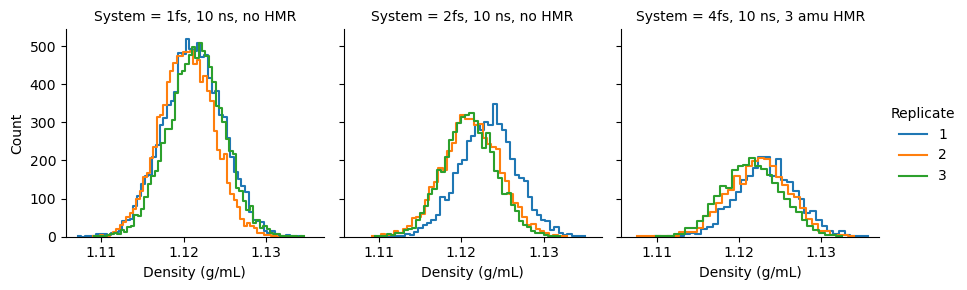

In [42]:
g = sns.FacetGrid(
    # data=df,
    data=df[df["Time (ps)"] > 2.1],
    col="System",
    hue="Replicate",
)
g.map(sns.histplot, "Density (g/mL)", fill=False, element="step")
g.add_legend()

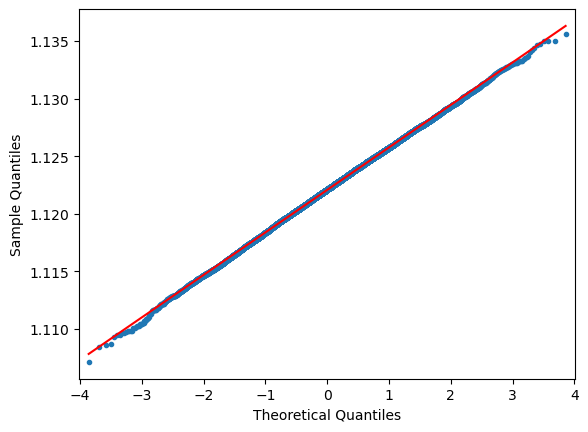

In [57]:
ax = statsmodels.graphics.gofplots.qqplot(
    df[df["Replicate"] == 1]["Density (g/mL)"],
    line="s",
    markersize=3
)

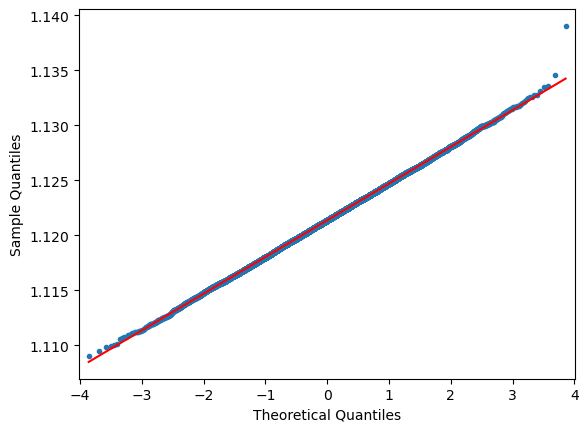

In [58]:
ax = statsmodels.graphics.gofplots.qqplot(
    df[df["Replicate"] == 3]["Density (g/mL)"],
    line="s",
    markersize=3
)